In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def one_hot(x):
    return np.identity(16)[x:x+1]

def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector==m)[0]
    return pr.choice(indices)

register(
    id='FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4',
           'is_slippery':False}
)

env = gym.make('FrozenLake-v3')

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tf.__version__

'2.3.0'

In [3]:
input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1

In [4]:
X = tf.placeholder(shape=[1, input_size], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([input_size, output_size],0,0.01)) # weight
Qpred = tf.matmul(X, W)

In [5]:
Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32)

In [6]:
loss = tf.reduce_sum(tf.square(Y-Qpred))

In [7]:
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [8]:
dis = 0.99
num_episodes = 2000
rList = []

In [9]:
init = tf.global_variables_initializer()

In [10]:
# with tf.Session() as sess:
sess = tf.Session()
sess.run(init)
for i in range(num_episodes):
    s = env.reset()
    e = 1. / ((i/50) + 10)
    rAll = 0
    done = False
    local_loss = []

    while not done:
        Qs = sess.run(Qpred, feed_dict={X:one_hot(s)})
        if np.random.rand(1) < e:
            a = env.action_space.sample()
        else:
            a = np.argmax(Qs)

        s1, reward, done, _ = env.step(a)
        if done:
            Qs[0,a] = reward
        else:
            Qs1 = sess.run(Qpred, feed_dict={X:one_hot(s1)})
            Qs[0, a] = reward + dis * np.max(Qs1)

        sess.run(train, feed_dict={X: one_hot(s), Y: Qs})

        rAll += reward
        s = s1
    rList.append(rAll)

In [11]:
print(sess.run(Qpred,feed_dict={X:one_hot(0)}))
print(sess.run(Qpred,feed_dict={X:one_hot(1)}))
print(sess.run(Qpred,feed_dict={X:one_hot(2)}))
print(sess.run(Qpred,feed_dict={X:one_hot(3)}))
print(sess.run(Qpred,feed_dict={X:one_hot(4)}))
print(sess.run(Qpred,feed_dict={X:one_hot(5)}))
print(sess.run(Qpred,feed_dict={X:one_hot(6)}))
print(sess.run(Qpred,feed_dict={X:one_hot(7)}))
print(sess.run(Qpred,feed_dict={X:one_hot(8)}))
print(sess.run(Qpred,feed_dict={X:one_hot(9)}))
print(sess.run(Qpred,feed_dict={X:one_hot(10)}))
print(sess.run(Qpred,feed_dict={X:one_hot(11)}))
print(sess.run(Qpred,feed_dict={X:one_hot(12)}))
print(sess.run(Qpred,feed_dict={X:one_hot(13)}))
print(sess.run(Qpred,feed_dict={X:one_hot(14)}))
print(sess.run(Qpred,feed_dict={X:one_hot(15)}))

[[0.93944407 0.91505533 0.9509894  0.94099325]]
[[9.4032139e-01 2.9426519e-06 9.6059549e-01 9.4651693e-01]]
[[0.8662632  0.9702986  0.91525495 0.9302069 ]]
[[0.95495355 0.0043128  0.008      0.13450682]]
[[5.9025637e-03 5.8838353e-03 7.1673864e-04 9.3926102e-01]]
[[0.00445141 0.00840168 0.00201488 0.0058058 ]]
[[2.2360016e-05 9.8009968e-01 1.4302965e-04 9.4691300e-01]]
[[0.00810451 0.00116525 0.00543153 0.00382196]]
[[0.00476336 0.00190147 0.00559623 0.00591919]]
[[0.00610262 0.00183029 0.9743517  0.00625153]]
[[9.3588138e-01 9.8999977e-01 9.6617536e-05 9.4827557e-01]]
[[0.00278728 0.00081212 0.00465257 0.00152807]]
[[0.00370263 0.00710886 0.00596977 0.000547  ]]
[[0.00592657 0.00782897 0.9786848  0.00629279]]
[[0.9128387  0.96788555 0.9999999  0.97549105]]
[[0.00291394 0.00705857 0.00270913 0.00666017]]


percent of successful episodes : 0.9465%


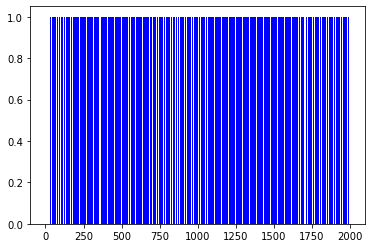

In [12]:
print("percent of successful episodes : " + str(sum(rList)/num_episodes) + "%")
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

In [13]:
sess.close()